In [ ]:
pip install pandas numpy matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load Data from CSV
# Replace 'your_file.csv' with the actual file path.
file_path = 'monthly-beer-production.csv'

# Load the CSV file into a DataFrame, parsing 'Date' as datetime and setting it as the index.
df = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')

# Step 2: Clean Missing Values
print("\nInitial Missing Values:")
print(df.isnull().sum())

# Method 1: Forward fill missing values (You can also use 'bfill' or 'interpolate')
df['Production'].fillna(method='ffill', inplace=True)

# Check again for missing values after filling
print("\nMissing Values After Forward Fill:")
print(df.isnull().sum())

# Step 3: Detect and Handle Outliers
# Outliers: Define outliers as those that are more than 3 standard deviations from the mean.
mean = df['Production'].mean()
std_dev = df['Production'].std()

outliers = df[(df['Production'] > mean + 3 * std_dev) | (df['Production'] < mean - 3 * std_dev)]
print("\nOutliers Detected:")
print(outliers)

# Option 1: Remove outliers (alternatively, you could clip them instead)
df_no_outliers = df[(df['Production'] <= mean + 3 * std_dev) & (df['Production'] >= mean - 3 * std_dev)]

# Option 2: Clip outliers to the max/min acceptable range
# df['Production'] = np.clip(df['Production'], mean - 3 * std_dev, mean + 3 * std_dev)

# Step 4: Resampling Data
# Resample data to quarterly frequency and take the mean for each quarter.
df_resampled = df.resample('Q').mean()

# Step 5: Time Series Decomposition (Optional)
# Decompose the time series into trend, seasonal, and residual components.
result = seasonal_decompose(df['Production'], model='multiplicative', period=12)  # Assuming monthly data (12 periods/year)
result.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

# Step 6: Data Scaling (Optional, for modeling or normalization)
# Apply MinMaxScaler to scale the 'Production' column to range between 0 and 1.
scaler = MinMaxScaler()
df['Production_scaled'] = scaler.fit_transform(df[['Production']])

# Step 7: Visualization
# Plot the original data, the cleaned data, and resampled data.
plt.figure(figsize=(14, 8))

# Plot 1: Original Monthly Data
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Production'], label='Monthly Production')
plt.title('Original Monthly Beer Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()

# Plot 2: Cleaned Data (Without Outliers)
plt.subplot(3, 1, 2)
plt.plot(df_no_outliers.index, df_no_outliers['Production'], label='Cleaned Production (No Outliers)', color='orange')
plt.title('Monthly Beer Production (No Outliers)')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()

# Plot 3: Quarterly Resampled Data
plt.subplot(3, 1, 3)
plt.plot(df_resampled.index, df_resampled['Production'], label='Quarterly Resampled Production', color='green')
plt.title('Quarterly Resampled Beer Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()

plt.tight_layout()
plt.show()



Initial Missing Values:
Monthly beer production    0
dtype: int64


KeyError: 'Production'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

# Step 1: Load Data from CSV
# Assuming the CSV has columns "Date" and "Production"
# Example: pd.read_csv('monthly_beer_production.csv')

file_path = 'monthly-beer-production.csv'

# Load data into a DataFrame
df = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')

# Step 2: Handle Missing Values
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Fill missing values with forward fill method (or choose other techniques like interpolation)
df['Production'].fillna(method='ffill', inplace=True)

# Step 3: Handling Outliers
# Outliers are defined as values more than 3 standard deviations from the mean
mean = df['Production'].mean()
std_dev = df['Production'].std()

outliers = df[(df['Production'] > mean + 3 * std_dev) | (df['Production'] < mean - 3 * std_dev)]
print("\nOutliers detected:")
print(outliers)

# Optionally, handle outliers by clipping them
df['Production'] = np.clip(df['Production'], mean - 3 * std_dev, mean + 3 * std_dev)

# Step 4: Resampling Data (Optional)
# Resample to quarterly data, taking the mean of each quarter
df_resampled = df.resample('Q').mean()

# Step 5: Time Series Decomposition (Optional)
# Decompose the time series to see trend, seasonal, and residual components
result = seasonal_decompose(df['Production'], model='additive', period=12)  # 12 months for annual seasonality
result.plot()
plt.show()

# Step 6: Data Scaling/Normalization (Optional)
# Scale the data if needed for machine learning or other techniques
scaler = StandardScaler()
df['Production_scaled'] = scaler.fit_transform(df[['Production']])

# Step 7: Visualization
# Plot original monthly data and the resampled quarterly data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Production'], label='Monthly Production')
plt.title('Monthly Beer Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()

# Resampled data plot
plt.subplot(2, 1, 2)
plt.plot(df_resampled.index, df_resampled['Production'], label='Quarterly Resampled Production', color='orange')
plt.title('Quarterly Resampled Beer Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()

plt.tight_layout()
plt.show()



Missing values in the dataset:
Monthly beer production    0
dtype: int64


KeyError: 'Production'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('monthly-beer-production.csv', parse_dates=['Month'], index_col='Month')

# Check the first few rows of the dataframe
print(df.columns)

# Plot the data
df['Production'].plot(figsize=(10, 6), title="Monthly Beer Production")
plt.xlabel('Month')
plt.ylabel('Beer Production')
plt.show()


Index(['Monthly beer production'], dtype='object')


KeyError: 'Production'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
file_path = "monthly-beer-production.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())
# Check for missing values and data types
print(data.info())
print(data.describe())

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
# Handle missing values (e.g., interpolate or forward-fill)
data['Production'] = data['Production'].interpolate(method='linear')

# Verify no missing values remain
print(data.isnull().sum())
# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as the index
data.set_index('Month', inplace=True)

# Sort index to ensure proper time series order
data = data.sort_index()

# Check the dataset
print(data.head())
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Production'], label='Monthly Beer Production')
plt.title('Monthly Beer Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()
# Resample to yearly frequency (if needed)
yearly_data = data['Production'].resample('Y').sum()

# Plot yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data, label='Yearly Beer Production', color='orange')
plt.title('Yearly Beer Production')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()
# Normalize the production data (Min-Max Scaling)
data['Normalized_Production'] = (data['Production'] - data['Production'].min()) / \
                                 (data['Production'].max() - data['Production'].min())

# Check normalized data
print(data.head())
# Rolling statistics for outlier detection
data['Rolling_Mean'] = data['Production'].rolling(window=12).mean()

# Plot rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data['Production'], label='Original')
plt.plot(data['Rolling_Mean'], label='Rolling Mean', color='red')
plt.title('Rolling Mean - Outlier Detection')
plt.legend()
plt.show()



     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB
None
       Monthly beer production
count               476.000000
mean                136.395378
std                  33.738725
min                  64.800000
25%                 112.900000
50%                 139.150000
75%                 158.825000
max                 217.800000
Number of duplicate rows: 0


KeyError: 'Production'

     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB
None
       Monthly beer production
count               476.000000
mean                136.395378
std                  33.738725
min                  64.800000
25%                 112.900000
50%                 139.150000
75%                 158.825000
max                 217.800000
Number of duplicate rows: 0
Month                      0
Monthly beer production    0
dtype: int64
            Monthly beer prod

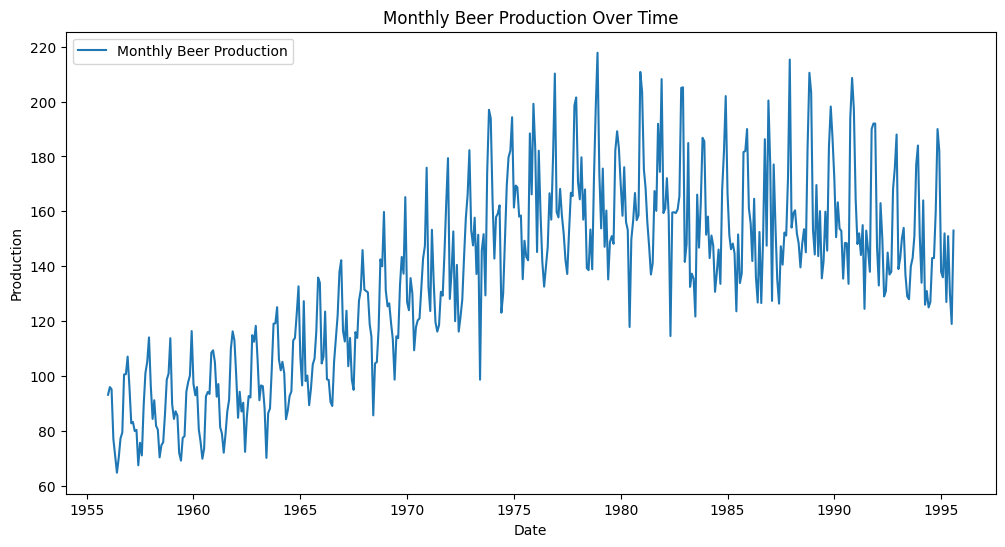

<ipython-input-20-2cf50a33c5ae>:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data['Monthly beer production'].resample('Y').sum()


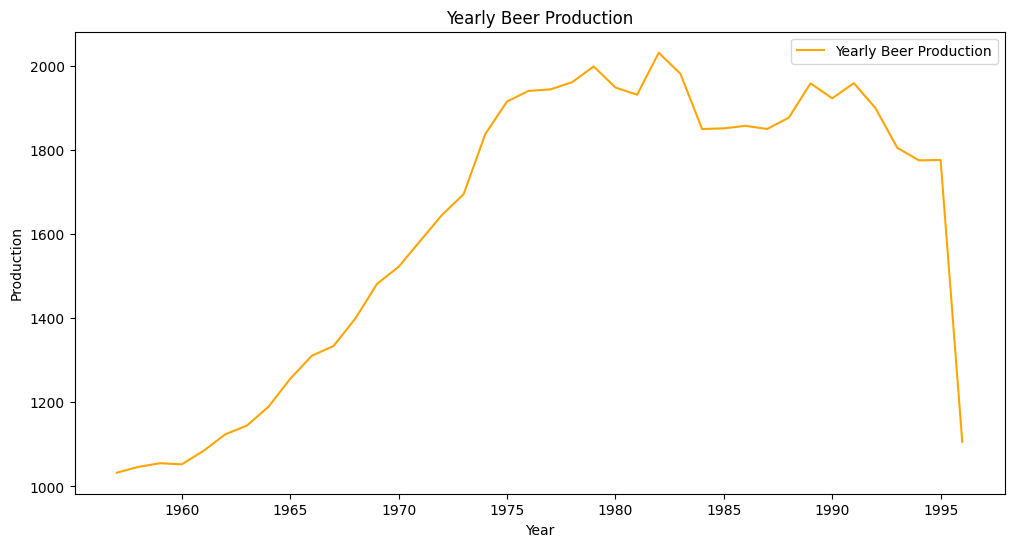

            Monthly beer production  Normalized_Production
Month                                                     
1956-01-01                     93.2               0.185621
1956-02-01                     96.0               0.203922
1956-03-01                     95.2               0.198693
1956-04-01                     77.1               0.080392
1956-05-01                     70.9               0.039869


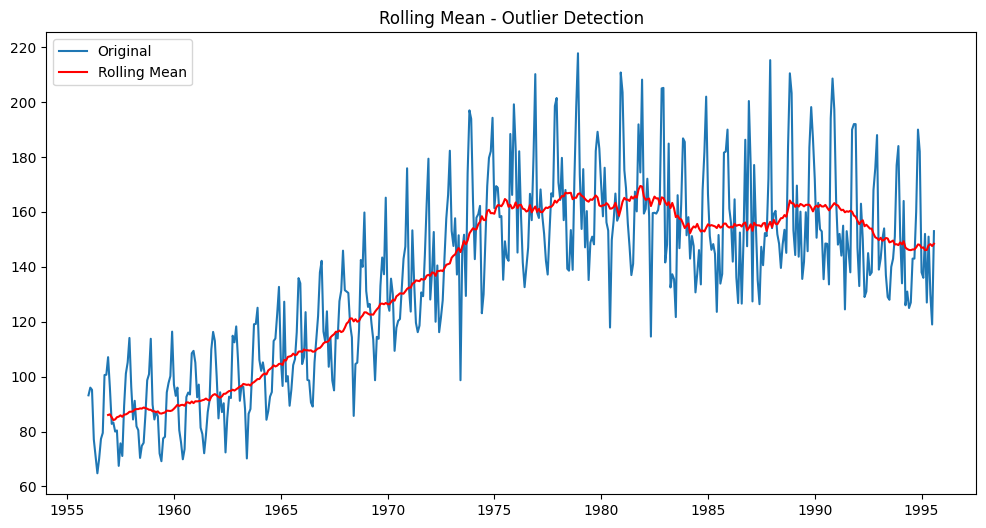

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load dataset
file_path = "monthly-beer-production.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())
# Check for missing values and data types
print(data.info())
print(data.describe())

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
# Handle missing values (e.g., interpolate or forward-fill)
# Assuming your production column is named 'Monthly beer production'
# Replace 'Monthly beer production' with the actual name if different
data['Monthly beer production'] = data['Monthly beer production'].interpolate(method='linear')

# Verify no missing values remain
print(data.isnull().sum())
# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as the index
data.set_index('Month', inplace=True)

# Sort index to ensure proper time series order
data = data.sort_index()

# Check the dataset
print(data.head())
# Plot the time series
plt.figure(figsize=(12, 6))
# Replace 'Monthly beer production' with actual column name
plt.plot(data['Monthly beer production'], label='Monthly Beer Production')
plt.title('Monthly Beer Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()
# Resample to yearly frequency (if needed)
# Replace 'Monthly beer production' with actual column name
yearly_data = data['Monthly beer production'].resample('Y').sum()

# Plot yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data, label='Yearly Beer Production', color='orange')
plt.title('Yearly Beer Production')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()
# Normalize the production data (Min-Max Scaling)
# Replace 'Monthly beer production' with actual column name
data['Normalized_Production'] = (data['Monthly beer production'] - data['Monthly beer production'].min()) / \
                                 (data['Monthly beer production'].max() - data['Monthly beer production'].min())

# Check normalized data
print(data.head())
# Rolling statistics for outlier detection
# Replace 'Monthly beer production' with actual column name
data['Rolling_Mean'] = data['Monthly beer production'].rolling(window=12).mean()

# Plot rolling mean
plt.figure(figsize=(12, 6))
# Replace 'Monthly beer production' with actual column name
plt.plot(data['Monthly beer production'], label='Original')
plt.plot(data['Rolling_Mean'], label='Rolling Mean', color='red')
plt.title('Rolling Mean - Outlier Detection')
plt.legend()
plt.show()